In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [16]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [17]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
X = train_df[features].fillna(0)
y = train_df['SalePrice']

# Clean test set with same features
X_test_final = test_df[features].fillna(0)

In [18]:
df = pd.read_csv("train.csv")

In [19]:
data = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]
data = data.dropna()


In [20]:
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']


In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

RMSE: 52975.717713381215
R² Score: 0.6341189942328374


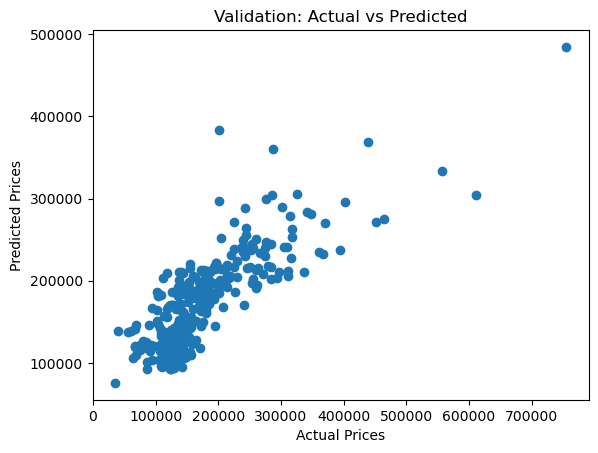

In [23]:
y_pred = model.predict(X_valid)
print("RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("R² Score:", r2_score(y_valid, y_pred))

plt.scatter(y_valid, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Validation: Actual vs Predicted")
plt.show()


In [24]:
test_predictions = model.predict(X_test_final)

In [25]:
average_price = y_pred.mean()
print(f"🏠 The average predicted house price is: ₹\033[1m{average_price:,.2f}\033[0m")


🏠 The average predicted house price is: ₹176,628.46


In [26]:
print("RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))
print("R² Score:", r2_score(y_valid, y_pred))

RMSE: 52975.717713381215
R² Score: 0.6341189942328374


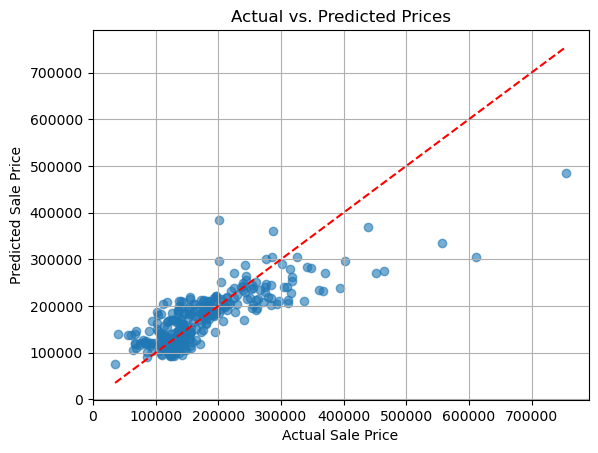

In [27]:
plt.scatter(y_valid, y_pred, alpha=0.6)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Prices")
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')  # ideal line
plt.grid(True)
plt.show()

In [28]:
submission = sample_submission.copy()
submission['SalePrice'] = test_predictions
submission.to_csv("my_submission.csv", index=False)
